# Exercise 4 - Filtering in the Frequency Domain (45 mins)

## Objectives
- To understand what a digital filter can do
- To learn different approaches of filtering in the frequency-domain including the direct method and FIR design

## Video ([Backup Link](https://www.youtube.com/watch?v=9H5TElFeJOo))

In [1]:
# Embed Youtube video
from IPython.display import HTML 
HTML('''<script> code_show=true;function code_toggle() {if (code_show){$('.cm-comment:contains(@hidden)').closest('div.input').hide();} else {$('.cm-comment:contains(@hidden)').closest('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><center><iframe width="560" height="315" src="https://www.youtube.com/embed/9H5TElFeJOo?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>''') # @hidden 

## Lab Exercise

### What is a Digital Filter?

The purpose of a digital filter, like any other filters, is to enhance and suppress some frequency components in a signal. This is referred to as frequency selectivity. In this lab, we will restrict ourselves to filters that are linear and time-invariant. 
>- A filter is linear if the response to the sum of the two inputs is equals to the sum of the individual responses taken separately.
>- A time-invariant filter is one whose characteristics do not alter with time. 

We make these two restrictions because they greatly simplify the mathematics involved. Linear time-invariant filters may also be made from analogue components such as resistors, capacitors, inductors and op-amps.

### Direct Method in the Frequency-Domain

An obvious way to filter a signal is to modify its frequency components or spectrum. The steps are:

1. Take the DFT of the signal to obtain its frequency-domain representation or spectrum.
2. Set unwanted components in the spectrum to zero.
3. Take the inverse DFT of the modified spectrum.

### Lab Exercise

Let us filter part of a song, `track_1.wav`, by removing all components above 300 Hz. Before this, listen to the original track so that you can compare it with the filtered signal:

<audio controls src="files/track_1.wav"> 
</audio>

To generate the filtered waveform, run the following code and listen to the output:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

from scipy.fft import fft
from scipy.fft import ifft
from functions.lab_functions import plot_signal

x, fs = sf.read('files/track_1.wav') 
Tsamp = 1/fs
Nsamp = len(x)

X = fft(x);

cutoff = 300
n = round(cutoff/fs*Nsamp) # calculate the frequency index

f_step = np.arange(0, fs, fs/Nsamp);

plt = plot_signal(f_step, abs(X), title='DFT (Orignal)', xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.show()

X[n:-n] = 0; # Set unwanted frequencies to zero

plt = plot_signal(f_step, abs(X), title='DFT (Low-pass Filter)', xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.show()

y = ifft(X);

sf.write('results/ex4/track_1_lowpass.wav', np.real(y), fs)
print('Filtered Audio Output (Low-pass):')
ipd.Audio('results/ex4/track_1_lowpass.wav') # display audio player

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Filtered Audio Output (Low-pass):


**Question 4.1**: Now try to modify the code below to create a high-pass filter by removing all components below 300 Hz. Listen to the output `track_1_highpass.wav`

>**GTA Tip**
>
>Note that the filtered waveform should still be real. If your result is not real it is because you have destroyed the conjugate symmetric property in the frequency domain that makes the signal real in the time domain.


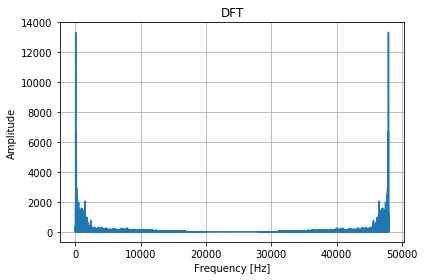

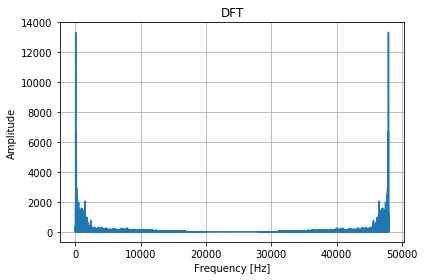

Filtered Audio Output (High-pass):


In [3]:
# TODO: Modify this code to create a high-pass filter
x, fs = sf.read('files/track_1.wav') 
Tsamp = 1/fs
Nsamp = len(x)

X = fft(x);

cutoff = 300
n = round(cutoff/fs*Nsamp) # calculate the frequency index

f_step = np.arange(0, fs, fs/Nsamp);

plt = plot_signal(f_step, abs(X), title='DFT', xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.show()

# TODO: Set unwanted frequencies to zero (for a highpass filter)

plt = plot_signal(f_step, abs(X), title='DFT', xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.show()

y = ifft(X);

sf.write('results/ex4/track_1_highpass.wav', np.real(y), fs) 
print('Filtered Audio Output (High-pass):')
ipd.Audio('results/ex4/track_1_highpass.wav') # display audio player

**Question 4.2**: What are the disadvantages of filtering in the frequency domain?
 
It is useful to know that if a signal $x[n]$ has a special property in the time domain then there will be a corresponding property in the frequency domain, $X(e^{j\Omega}) \text{ and } X[k]$ (and vice versa).

| One Domain           | Other Domain             
| -------------------- | ------------------------ 
| Discrete             | Periodic                 
| Symmetric            | Symmetric                 
| Antisymmetric        | Antisymmetric             
| Real                 | Conjugate Symmetric       
| Imaginary            | Conjugate Antisymmetric   
| Real & Symmetric     | Real & Symmetric          
| Real & Antisymmetric | Imaginary & Antisymmetric
 
$\begin{align}
\quad \text{Symmetric: } &x[n]=x[-n]\\
&X(e^{j\Omega})=X(e^{-j\Omega})\\
&X[k]=X[(-k)_{\text{mod} N}]=X[N-k] \text{ for } k>0
\end{align}$

$\quad$ Conjugate Symmetric: $x[n]=x^*[-n]$ 

$\quad$ Conjugate Antisymmetric: $x[n]=-x^*[-n]$ 

The filters we have just created using the direct method above have the following frequency response:

<img src="img/ex4_1.png"/> <img src="img/ex4_2.png"/>

**Question 4.3**: In the plot above, the frequency response is perfect at the sample points but not between them. Can you explain why?

### Finite Impulse Response (FIR) and Infinite Impulse Response (IIR) filters

We have now seen how we can filter a signal by setting all unwanted frequency components (**direct method**) but this is not the only, nor the best, way to filter a signal. In the optional exercises 6 & 7 (if you chose to do them), we will look at two better approaches using Finite Impulse Response (FIR) and Infinite Impulse Response (IIR) filters. However, as these exercise are optional, we will quickly demonstrate an FIR filter here.

**FIR Example**

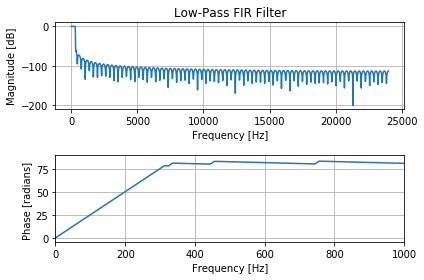

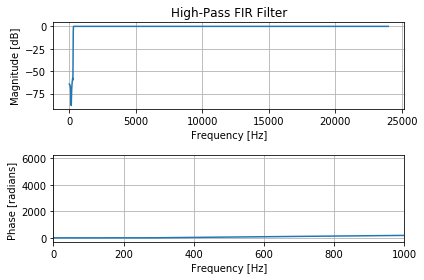

Filtered Audio Output (FIR Low-pass):


Filtered Audio Output (FIR High-pass):


In [ ]:
from scipy import signal
from functions.lab_functions import plot_spec
 
# Desired cutoff, Hz
cutoff = 300  

# The Nyquist rate of the signal.
nyq_rate = fs/2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 50 Hz transition width.
width = 50.0/nyq_rate

# The desired attenuation in the stop band in dB.
ripple_db = 70.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = signal.kaiserord(ripple_db, width)

# Use firwin with a Kaiser window to create a low-pass FIR filter.
b_fir_lpf = signal.firwin(N, cutoff/nyq_rate)

# Use firwin with a Kaiser window to create a high-pass FIR filter.
b_fir_hpf = signal.firwin(N, cutoff/nyq_rate, pass_zero=False)

w, h = signal.freqz(b_fir_lpf, [1], worN=2000)

# Plot low-pass FIR filter
f_step = w*fs/(2*np.pi)

plt = plot_spec(f_step, h, title='Low-Pass FIR Filter', dB=True)
plt.xlim([0, 1000])
plt.show()

# Plot high-pass FIR filter
w, h = signal.freqz(b_fir_hpf, [1], worN=2000)
plt = plot_spec(f_step, h, title='High-Pass FIR Filter', dB=True)
plt.xlim([0, 1000])
plt.show()

# Convolve FIR filters with the original signal
x_lp = np.convolve(x, b_fir_lpf);
x_hp = np.convolve(x, b_fir_hpf);

# Write the output to .wav files
sf.write('results/ex4/speech_fir_lowpass.wav', x_lp, fs) 
print('Filtered Audio Output (FIR Low-pass):')
ipd.display(ipd.Audio('results/ex4/speech_fir_lowpass.wav')) # display audio player

sf.write('results/ex4/speech_fir_highpass.wav', x_hp, fs) 
print('Filtered Audio Output (FIR High-pass):')
ipd.display(ipd.Audio("results/ex4/speech_fir_highpass.wav")) # display audio player

**Question 4.4**: Compare and describe the frequency responses of the filter computed using the direct method and the FIR filter. Can you explain any difference in the filtered outputs?

**Question 4.5**: What are the advantages and disadvantages of using the direct-method and a FIR to perform filtering?